CV Wigner function $W(x,p)={\frac {1}{\pi \hbar }}\int _{-\infty }^{\infty }\langle x+y|{\hat {\rho }}|x-y\rangle e^{-2ipy/\hbar }\,dy$

# Discrete wigner function
$$W(\mu,m)=\frac{1}{d}\sum_{n} \langle m-n|\rho|m+n\rangle e^{2i\mu n/d}$$

Here the Hilbert space dimension is $d$, $m=0,1,2,\ldots,d-1$, $\mu=-s,-s+1,\ldots,s$ with $d=2s+1$

$W$ is a matrix of size $dxd$ for odd $d$ and $(d+1)xd$ for even $d$  

The negativity is $\sum_{m,\mu} (|W(\mu,m)|-W(\mu,m))/d$

In [3]:
# functions:
# 1. dft(x,d1=None) modified discrete Fourier transform, len(d) must be odd
# 2. Wig(psi) discrete Wigner without periodic conditions
# 3. Neg(a) negativity

import numpy as np 

#
# modified discrete Fourier transform
#
def dft(x):
    d=len(x) # d must be odd
    s=int((d-1)/2)
        
    res = np.sum(x*np.exp(2.*1j*np.outer(np.arange(-s,s+1),np.arange(-s,s+1))/d), axis=1)
    return res
#
# discrete Wigner function
#
def Wig(psi):
    d=len(psi) # the Hilbert space dimension
    rho=np.outer(psi,np.conj(psi)) # pure density matrix
    
    if d%2==1:
        W=np.zeros([d,d])
    else:
        W=np.zeros([d+1,d])
    
    # loop over all diagonals
    for i in range(-d+1,d,2):
        x=rho[::-1,:].diagonal(i)
        
        while(len(x)<d):
            x=np.pad(x, (1, 1),'constant', constant_values=(0, 0))
            
        m=int((i+d-1)/2)    
        W[:,m]=dft(x).real
    
    return W/d
    
# Negativity = sum of negative entries of a given matrix
    
def Neg(a):
    return np.sum(np.abs(a)-a)/len(a)

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

def WaveHarmOsc(x,n):
    coef=np.eye(1, n+1, n)[0]
    return (1/np.sqrt((2**n)*np.math.factorial(n)))*\
    np.exp(-x*x/2)*\
    np.polynomial.hermite.hermval(x,coef)    

(41, 41)


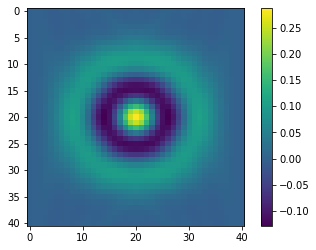

0.6710367272564651


In [8]:
x=np.linspace(-3,3,41)
y=WaveHarmOsc(x,2)


W=Wig(y)

print(W.shape)
plt.imshow(W)
plt.colorbar()
plt.show()

print(Neg(W))

 # Вверху функция Вигнера W для 2-го возбужденного уровня осциллятора.  41 точка на интервале $x\in [-3,3]$  Здесь и далее цифра под графиком --- negativity 

(41, 41)


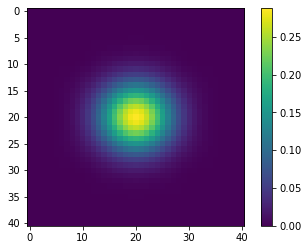

0.0017262420662734082


In [9]:
x=np.linspace(-3,3,41)
y=WaveHarmOsc(x,0)


W=Wig(y)

print(W.shape)
plt.imshow(W)
plt.colorbar()
plt.show()

print(Neg(W))

# то же самое для основного состояния

(81, 81)


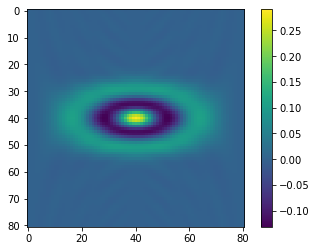

0.731981232799664


In [12]:
x=np.linspace(-3,3,81)
y=WaveHarmOsc(x,2)


W=Wig(y)

print(W.shape)
plt.imshow(W)
plt.colorbar()
plt.show()

print(Neg(W))

# теперь количество точек 81. 2-е возб. состояние

(201, 201)


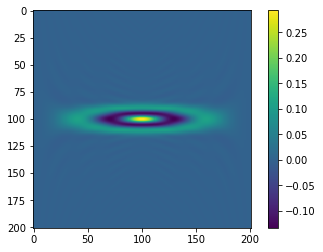

0.8153298493633763


In [15]:
x=np.linspace(-3,3,201)
y=WaveHarmOsc(x,2)


W=Wig(y)

print(W.shape)
plt.imshow(W)
plt.colorbar()
plt.show()

print(Neg(W))

# количество точек 81